# 1.2 Exercises: Charts

# Rahul Rajeev

In [106]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [107]:
# loading datasets
contestwinners = pd.read_excel('hotdogcontestwinners.xlsm')
hotdogplaces = pd.read_excel('hotdogplaces.xlsm')
obamaratings = pd.read_excel('obamaapprovalratings.xls')

In [108]:
# preview
contestwinners.head()

,Year,Winner,Dogs eaten,Country,New record
0,1980,Paul Siederman & Joe Baldini,9.1,United States,0
1,1981,Thomas DeBerry,11.0,United States,0
2,1982,Steven Abrams,11.0,United States,0
3,1983,Luis Llamas,19.5,Mexico,0
4,1984,Birgit Felden,9.5,Germany,0


In [109]:
# preview
hotdogplaces.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,25,50.0,50.5,44.5,53.5,49,54,66,59,68.0,54
1,24,31.0,26.0,30.5,38.0,37,52,63,59,64.5,43
2,22,23.5,25.5,29.5,32.0,32,37,49,42,55.0,37


In [110]:
# preview
obamaratings.head()

,Issue,Approve,Disapprove,None
0,Race Relations,52,38,10
1,Education,49,40,11
2,Terrorism,48,45,7
3,Energy Policy,47,42,11
4,Foreign Affairs,44,48,8


In [111]:
# fixing the hotdogplaces dataset
hotdogplaces_t = hotdogplaces.T
hotdogplaces_t.index.name = 'Year'
hotdogplaces_t.reset_index(inplace=True)
hotdogplaces_t.columns = ['year', 'col1', 'col2', 'col3']
hotdogplaces_t.to_csv('hotdogplaces_t.csv')
hotdogplaces_t

,year,col1,col2,col3
0,2000,25.0,24.0,22.0
1,2001,50.0,31.0,23.5
2,2002,50.5,26.0,25.5
3,2003,44.5,30.5,29.5
4,2004,53.5,38.0,32.0
5,2005,49.0,37.0,32.0
6,2006,54.0,52.0,37.0
7,2007,66.0,63.0,49.0
8,2008,59.0,59.0,42.0
9,2009,68.0,64.5,55.0


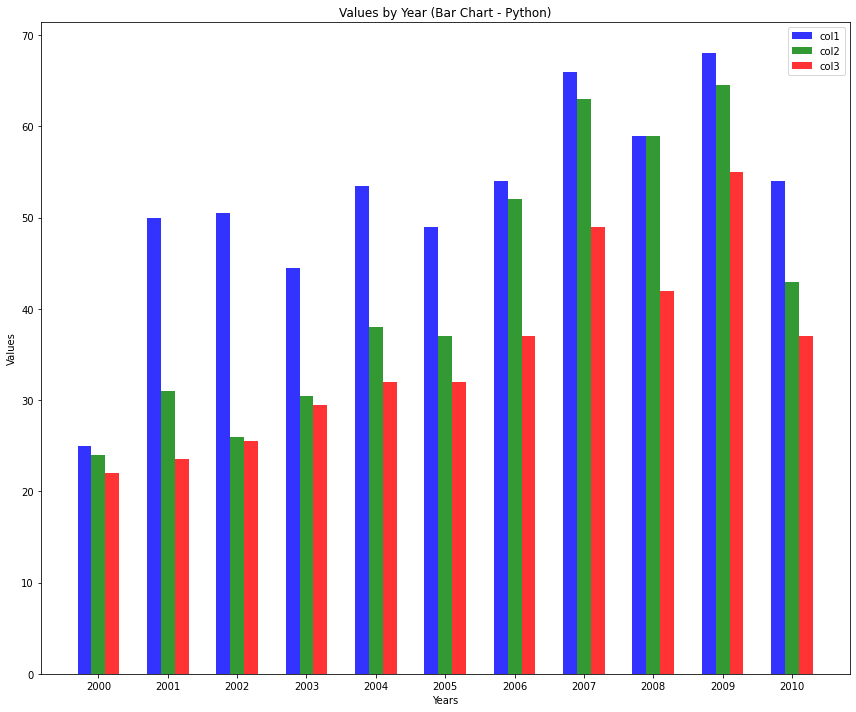

In [112]:
# bar chart - Python
# per year of the hotdog places with each year
# data to plot

# create plot
fig, ax = plt.subplots(figsize=(12, 10))
index = np.arange(11)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index, hotdogplaces_t['col1'], bar_width,
alpha=opacity,
color='b',
label='col1')

rects2 = plt.bar(index + bar_width, hotdogplaces_t['col2'], bar_width,
alpha=opacity,
color='g',
label='col2')

rects3 = plt.bar(index + 2*bar_width, hotdogplaces_t['col3'], bar_width,
alpha=opacity,
color='r',
label='col3')

plt.xlabel('Years')
plt.ylabel('Values')
plt.title('Values by Year (Bar Chart - Python)')
plt.xticks(index + bar_width, ('2000', '2001', '2002', '2003', '2004', '2005', '2006','2007','2008','2009','2010'))
plt.legend()

plt.tight_layout()
plt.show()

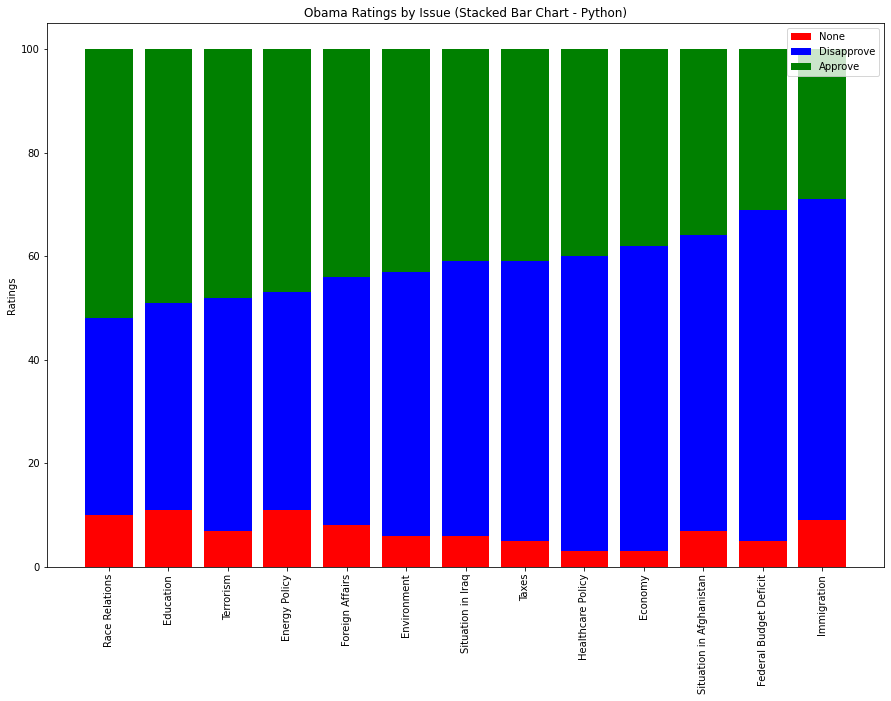

In [119]:
# stacked bar chart - Python
# votes for each issue, approve, disapprove, none
plt.figure(figsize=(15,10));
plt.bar(obamaratings['Issue'], obamaratings['None'], color='r')
plt.bar(obamaratings['Issue'], obamaratings['Disapprove'], bottom=obamaratings['None'], color='b')
plt.bar(obamaratings['Issue'], obamaratings['Approve'], bottom=obamaratings['Disapprove'] + obamaratings['None'], color='g')
plt.legend(labels = ['None', 'Disapprove', 'Approve'])
plt.xticks(rotation=90)
plt.title('Obama Ratings by Issue (Stacked Bar Chart - Python)')
plt.ylabel('Ratings')
plt.show()

In [114]:
# data for pie chart, summing the ratings counts
total = obamaratings.drop('Issue', axis=1)
total = total.sum(axis=0).reset_index()
total.columns = ['vote', 'count']

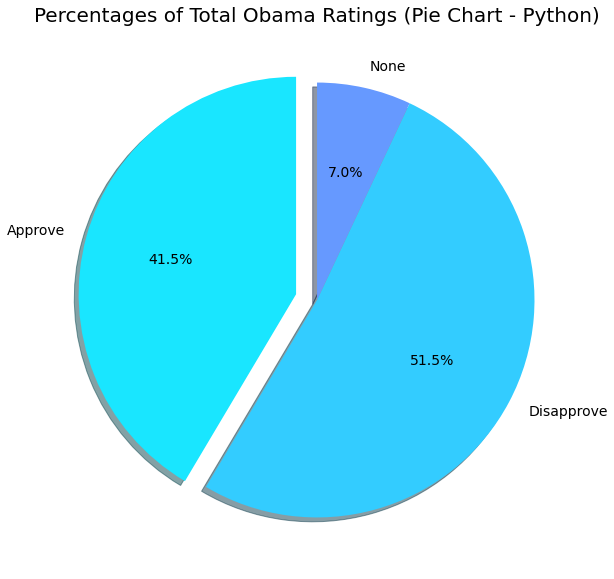

In [115]:
# pie chart - Python
# percents of votes for approve, disapprove, and none

explode = (0.1,0 , 0)

a = plt.cm.cool
colors = [a(0.1),a(0.2),a(0.4)]

plt.figure(figsize=(15,10));
plt.pie(total['count'], labels = total['vote'], autopct='%1.1f%%', colors = colors, textprops={'fontsize': 14},
        explode=explode, shadow=True, startangle=90)
plt.title('Percentages of Total Obama Ratings (Pie Chart - Python)', fontsize = 20)
plt.show()

In [116]:
# data for donut plot
contestwinnerscount = contestwinners.groupby(['Country'])['Country'].count()
contestlabels = contestwinnerscount.keys().tolist()
contestvalues = contestwinnerscount.values.tolist()

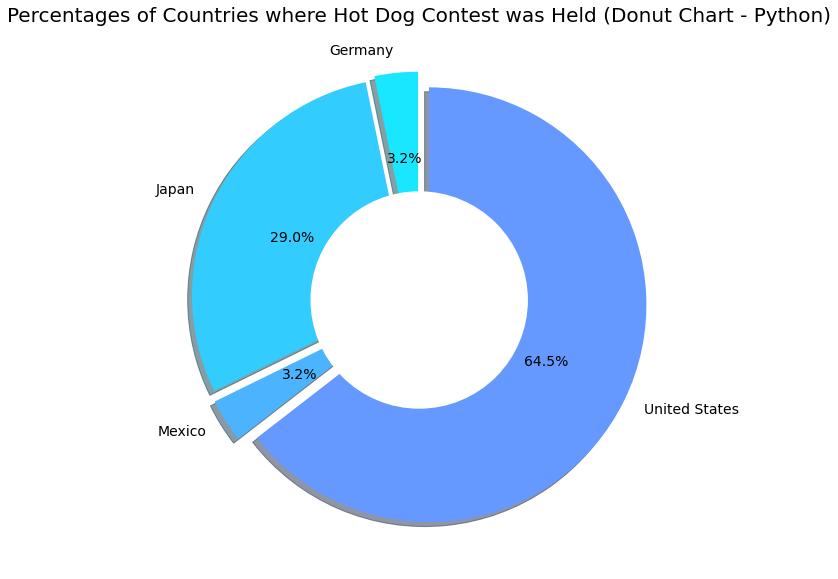

In [117]:
# donut - Python
# countries where the contest was held

explode = (0.05,0.05, 0.05, 0.05)
colors = [a(0.1),a(0.2),a(0.3), a(0.4)]
plt.figure(figsize=(15,10));
plt.pie(contestvalues, labels = contestlabels, autopct='%1.1f%%', colors = colors, textprops={'fontsize': 14},
        explode=explode, shadow=True, startangle=90)
plt.title('Percentages of Countries where Hot Dog Contest was Held (Donut Chart - Python)', fontsize = 20)

# Circle
centre_circle = plt.Circle((0, 0), 0.5,fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.show()

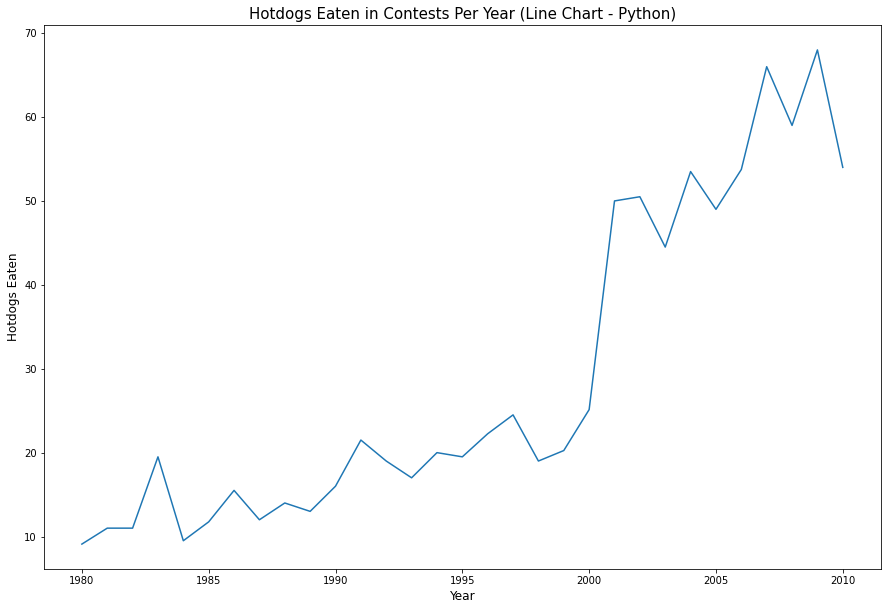

In [118]:
# line chart - Python
# hotdogs eaten in contests per year
plt.figure(figsize=(15,10));
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Hotdogs Eaten', fontsize = 12)
plt.title('Hotdogs Eaten in Contests Per Year (Line Chart - Python)', fontsize=15)
plt.plot(contestwinners['Year'], contestwinners['Dogs eaten'])